# Análisis exploratorio de datos de MOOCs

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

Cargamos la información

In [186]:
edx_df = pd.read_csv('data/edx_courses.csv')
udemy_df = pd.read_csv('data/udemy_courses.csv')
coursera_df = pd.read_csv('data/coursera_courses.csv')

In [187]:
reviews = pd.read_csv('data/coursera_reviews.csv')

Antes de hacer un análisis de los datos los exploraremos y haremos una pequeña limpieza de ser necesario

### Explorando edx

In [188]:
edx_df.head(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [189]:
edx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Es un bastante completo, aún así hay algunas cosas que hacer, procederemos llenando los nulos con 'Sin dato' excepto n_enrolled que se le pondrá 0

In [190]:
# Borramos si existe algún duplicado
edx_df = edx_df.drop_duplicates()

In [191]:
edx_df['n_enrolled'] = edx_df['n_enrolled'].fillna(0)
edx_df['n_enrolled'] = edx_df['n_enrolled'].apply(lambda x: str(x).replace(',', ''))
edx_df['n_enrolled'] = edx_df['n_enrolled'].astype(int)
edx_df['n_enrolled'].head(2) # Verificando el tipo de dato

0    124980
1    293864
Name: n_enrolled, dtype: int64

In [192]:
edx_df = edx_df.fillna('Sin dato')
edx_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               974 non-null    object
 1   summary             974 non-null    object
 2   n_enrolled          974 non-null    int64 
 3   course_type         974 non-null    object
 4   institution         974 non-null    object
 5   instructors         974 non-null    object
 6   Level               974 non-null    object
 7   subject             974 non-null    object
 8   language            974 non-null    object
 9   subtitles           974 non-null    object
 10  course_effort       974 non-null    object
 11  course_length       974 non-null    object
 12  price               974 non-null    object
 13  course_description  974 non-null    object
 14  course_syllabus     974 non-null    object
 15  course_url          974 non-null    object
dtypes: int64(1), object(15)
me

Investigamos la variable precio

In [193]:
# Devuelve un dataset que el precio no sea gratis
edx_df[edx_df['price'].apply(lambda x: not x.startswith('FREE'))]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url


Del dataset vacío anterior, podemos concluir que:
Si bien todos los cursos se los puede llevar gratis, los certificados se pagan, por lo que la columna price le ponemos el precio del certificado

In [194]:
edx_df['price'] = edx_df['price'].apply(lambda x: (x.split('$')[1]).split()[0])
edx_df['price'] = edx_df['price'].astype(float)
edx_df['price']

0       49.0
1       49.0
2       90.0
3      199.0
4      249.0
       ...  
970     25.0
971    139.0
972    139.0
973     25.0
974     79.0
Name: price, Length: 974, dtype: float64

### Explorando udemy

In [195]:
udemy_df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [196]:
udemy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Empezaremos borrando duplicados y luego viendo las relaciones que podemos sacar del dataset de Udemy

In [197]:
udemy_df = udemy_df.drop_duplicates()
len(udemy_df) # Solo había 6 duplicados

3672

In [198]:
udemy_df[udemy_df['is_paid']==False].head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
95,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,0,1514,66,11,Beginner Level,0.55,2017-03-23T22:19:57Z,Business Finance
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,False,0,50855,2698,15,Beginner Level,1.50,2013-12-25T19:53:34Z,Business Finance


Nos damos cuenta que is_paid hace referencia a precio de 0, por lo que se puede eliminar esa fila y solo trabajar con precio

In [199]:
udemy_df.drop(axis=1, columns='is_paid', inplace=True)

### Explorando coursera y coursera_reviews

In [200]:
coursera_df.head(5)

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [201]:
coursera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


Podemos ver que no hay nulos, pero hay poca información, revisaremos lo que hay en coursera_reviews

In [202]:
reviews.head(5)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


Empezamos buscando duplicados

In [203]:
dup_reviews = reviews[reviews.duplicated(keep=False)]

In [204]:
dup_reviews[dup_reviews['date_reviews']=='Oct 26, 2018'].head(5)

,reviews,reviewers,date_reviews,rating,course_id
15815,"It is not that much useful, because there is n...",By Girish,"Oct 26, 2018",1,python
15840,"It is not that much useful, because there is n...",By Girish,"Oct 26, 2018",1,python
15865,"It is not that much useful, because there is n...",By Girish,"Oct 26, 2018",1,python
32599,"Great course. Very approachable, well taught,...",By Harry E J J,"Oct 26, 2018",5,python
32624,"Great course. Very approachable, well taught,...",By Harry E J J,"Oct 26, 2018",5,python


Podemos ver que hay muchos duplicados, por lo que se procede a eliminarlos

In [205]:
reviews.drop_duplicates(inplace=True)
reviews

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training
...,...,...,...,...,...
1454636,amazing,By FANISHA A A,"Oct 10, 2020",5,computer-networking
1454639,great,By Ilona Y Z,"Oct 07, 2020",5,computer-networking
1454642,Nice,By Aung T K,"Oct 10, 2020",5,computer-networking
1454643,Good,By Anthony N S,"Oct 08, 2020",5,computer-networking


Se fueron casi 2/3 de los datos que habían y eran redundantes

Ahora aguparemos por course_id para poder unir las calificaciones con el dataframe de coursera

In [206]:
# Agrupa por cada course_id único y le saca la media del rating
ratings = reviews.groupby('course_id')['rating'].mean()
ratings

course_id
aboriginal-education                                        4.552239
access-control-sscp                                         4.466667
accounting-analytics                                        4.395299
accounting-data-analytics-python                            3.500000
actualizacion-manejo-diabetes-tipo-2                        4.845850
                                                              ...   
womens-health-human-rights                                  4.884298
write-a-feature-length-screenplay-for-film-or-television    4.625000
write-your-first-novel                                      3.850000
writing-editing-words                                       4.742857
writing-for-business                                        4.818742
Name: rating, Length: 604, dtype: float64

In [207]:
# Comprobamos que esté bien hecha la agrupación
print(reviews[reviews['course_id']=='aboriginal-education']['rating'].mean())
print(reviews[reviews['course_id']=='access-control-sscp']['rating'].mean())

4.552238805970149
4.466666666666667


Además, antes del merge también sacaremos cuántas valoraciones tiene cada curso

In [208]:
reviews_count = reviews.groupby('course_id')['rating'].count()
reviews_count

course_id
aboriginal-education                                         67
access-control-sscp                                          45
accounting-analytics                                        468
accounting-data-analytics-python                              8
actualizacion-manejo-diabetes-tipo-2                        253
                                                           ... 
womens-health-human-rights                                  242
write-a-feature-length-screenplay-for-film-or-television     32
write-your-first-novel                                       20
writing-editing-words                                       105
writing-for-business                                        811
Name: rating, Length: 604, dtype: int64

Procedemos a hacer el merge para tener el rating de los cursos

In [210]:
coursera_df = coursera_df.merge(ratings, on='course_id')
coursera_df = coursera_df.merge(reviews_count, on='course_id')
coursera_df.head(5)

,name,institution,course_url,course_id,rating_x,rating_y
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,4.739923,12677
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,4.816438,1460
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,4.929504,8199
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,4.767482,12055
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,4.818182,33


In [211]:
# Renombramos columnas para tener mayor consistencia en los datos
coursera_df = coursera_df.rename(columns={'name': 'title', 'rating_x': 'rating', 'rating_y': 'reviews_count'})

In [212]:
coursera_df['reviews_count'].describe()

count      604.000000
mean       860.839404
std       1608.604971
min          1.000000
25%        132.750000
50%        387.500000
75%        847.750000
max      15226.000000
Name: reviews_count, dtype: float64

Buscaremos los 10 cursos mejor valorados de Coursera, pero que tengan mínimo unas 100 reviews

In [213]:
coursera_sorted = coursera_df[['title', 'rating', 'reviews_count']].sort_values(by='rating', ascending=False)

coursera_sorted = coursera_sorted[coursera_sorted['reviews_count'] > 100]
coursera_sorted.head(10)

,title,rating,reviews_count
353,El Abogado del Futuro: Legaltech y la Transfor...,4.968000,125
292,Bugs 101: Insect-Human Interactions,4.962963,297
132,Everyday Parenting: The ABCs of Child Rearing,4.929530,596
2,The Science of Well-Being,4.929504,8199
329,Understanding Medical Research: Your Facebook ...,4.925094,267
198,Addiction Treatment: Clinical Skills for Healt...,4.924812,133
199,Dino 101: Dinosaur Paleobiology,4.922148,745
335,In the Studio: Postwar Abstract Painting,4.921739,460
421,Revisão Sistemática e Meta-análise,4.921109,469
424,Aprendiendo a aprender: Poderosas herramientas...,4.919417,3090


#### Nos encontramos con que el curso con mejor valoración es uno en español, además del décimo, de ahí hay unos 7 en inglés, y uno en portugés

In [214]:
# Continuando el análisis
print(len(coursera_df.groupby('institution')['rating'].mean()))
print(coursera_df.groupby('institution')['rating'].mean())

132
institution
(ISC)²                                      4.466667
Advancing Women in Product                  4.600000
Alberta Machine Intelligence Institute      4.569660
Amazon Web Services                         4.514876
American Museum of Natural History          4.734177
                                              ...   
Yale University                             4.864901
Yandex                                      3.484127
Yonsei University                           4.883041
École Polytechnique                         4.845122
École Polytechnique Fédérale de Lausanne    4.656879
Name: rating, Length: 132, dtype: float64


Debido a que no hay mucha información en este dataset se me ocurre ver que tipo de institución tiene mejor promedio de rating individualmente, pero como son 132 diferentes, en un gráfico no se va a entender nada por lo que se procede a agrupar por Universidad, Instituto u otros (Google, Amazon, etc)

In [215]:
# Se crea una función para eso
def type_institution(ins):
    ins = ins.lower()
    if 'universi' in ins or 'college' in ins:
        ins = 'University'
    elif 'institute' in ins:
        ins = 'Institute'
    else:
        ins = 'Other'

    return ins

In [216]:
coursera_df['type_ins'] = coursera_df['institution'].apply(type_institution)

Procedemos a graficar el tipo de instituto y su relación con el rating

In [217]:
rating_mean_by_institution = coursera_df.groupby('type_ins')['rating'].mean()

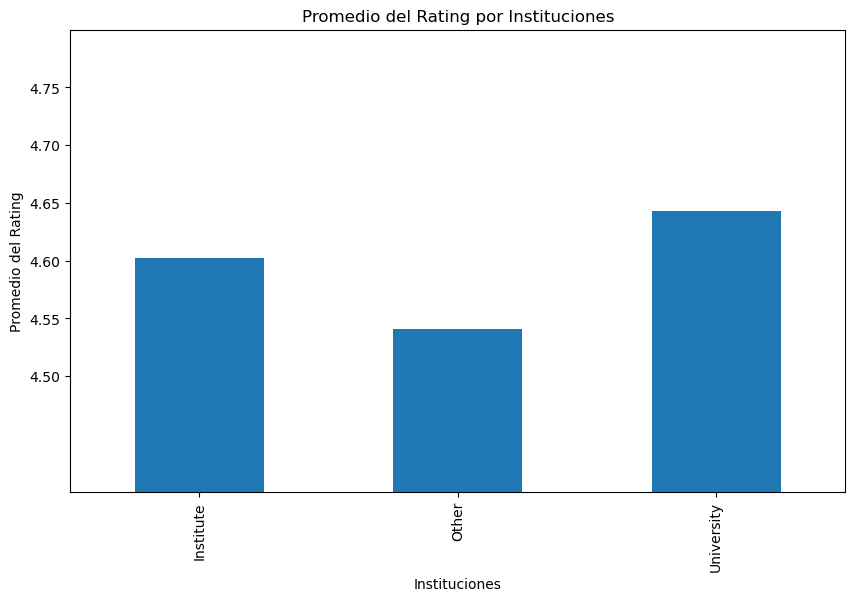

In [218]:
plt.figure(figsize=(10, 6))
rating_mean_by_institution.plot(kind='bar')

plt.title('Promedio del Rating por Instituciones')
plt.ylim(4.4, 4.8)
plt.yticks([4.5, 4.55, 4.6, 4.65, 4.7, 4.75])
plt.ylabel('Promedio del Rating')
plt.xlabel('Instituciones')

plt.show()

Vemos cuántos cursos tiene cada tipo de institución

In [219]:
coursera_df['type_ins'].value_counts()

University    458
Other         128
Institute      18
Name: type_ins, dtype: int64

Por último sacamos la proporción de votos respecto al tipo de institución

In [223]:
coursera_df.groupby('type_ins')['reviews_count'].sum() / coursera_df['type_ins'].value_counts()

Institute      815.833333
Other         1038.257812
University     813.024017
dtype: float64

#### Podemos decir que en Coursera hay muchos más cursos impartidos por universidades, estos también son los mejor valorados. También podemos observar que 'otros' tiene una calificación ligeramente inferior a las universidades e institutos, pero así mismo tienen más de 200 votos en promedio que las anteriores, así que ahí se podría encontrar otra correlación.

Buscando la correlación entre el rating y la cantidad de votos

<Figure size 1000x600 with 0 Axes>

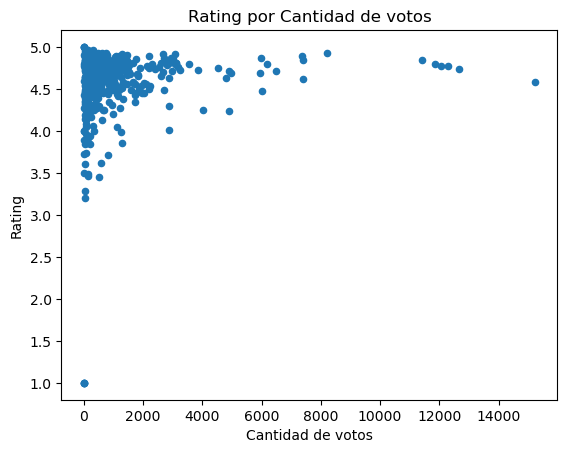

In [230]:
plt.figure(figsize=(10, 6))

coursera_df[['reviews_count', 'rating']].plot(x='reviews_count', y='rating', kind='scatter')

plt.title('Rating por Cantidad de votos')
plt.ylabel('Rating')
plt.xlabel('Cantidad de votos')

plt.show()

#### Si bien entre 12000 y 14000 votos se puede observar que el rating empieza a decaer, no se puede saber con certeza si estas variables están correlacionadas